In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parametric & Simulation-Based VaR

In [19]:
class MonteCarloVaREngine:
    def __init__(self, portfolio_value, mu, sigma, confidence=0.99, horizon_days=1):
        self.portfolio_value = portfolio_value
        self.mu = mu  # Expected return
        self.sigma = sigma  # Volatility
        self.confidence = confidence
        self.horizon_days = horizon_days

    def simulate_returns(self, n_scenarios=10000):
        np.random.seed(42)
        daily_returns = np.random.normal(loc=self.mu, scale=self.sigma, size=n_scenarios)
        portfolio_returns = self.portfolio_value * daily_returns * np.sqrt(self.horizon_days)
        return portfolio_returns

    def compute_var(self, losses):
        var_threshold = np.percentile(losses, (1 - self.confidence) * 100)
        return -var_threshold  # Return positive VaR value

    def plot_var_distribution(self, losses):
        var = self.compute_var(losses)
        plt.figure(figsize=(10, 6))
        plt.hist(losses, bins=100, color='skyblue', edgecolor='navy')
        plt.axvline(-var, color='crimson', linestyle='--', linewidth=2, label=f'{int(self.confidence*100)}% VaR = {var:,.0f}')
        plt.title('Portfolio Loss Distribution and VaR Threshold')
        plt.xlabel('Simulated Daily Loss')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.4)
        plt.legend()
        plt.tight_layout()
        plt.savefig("Parametric Simulation Based VaR.png", dpi=300)
        plt.show()

# Portfolio mockup and scenario simulation

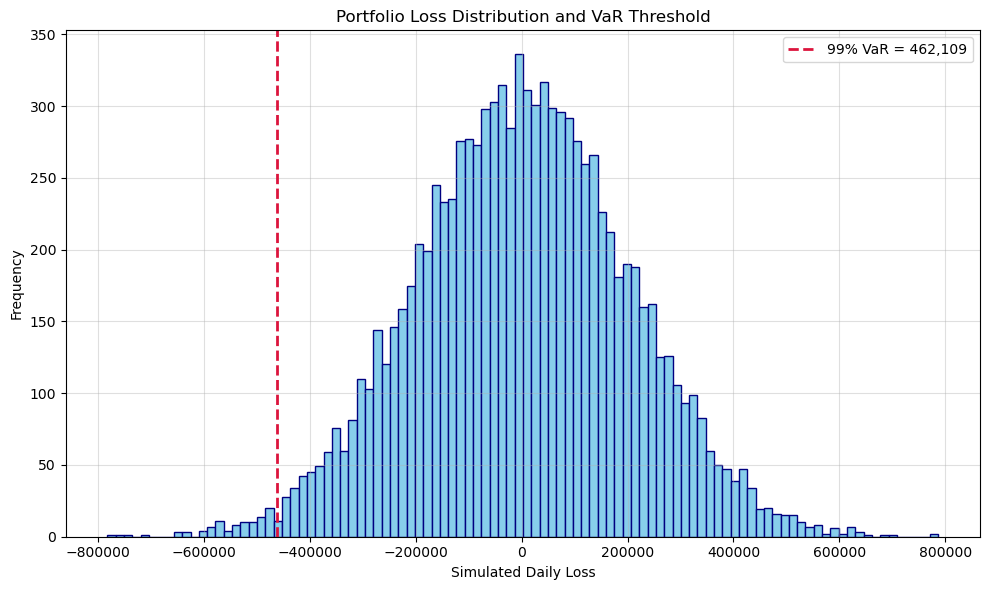

In [22]:
portfolio_value = 10_000_000  # Example: €10M book
mu = 0.0002                  # 2 bps daily return
sigma = 0.02                 # 2% daily vol

engine = MonteCarloVaREngine(portfolio_value, mu, sigma, confidence=0.99)
losses = engine.simulate_returns()
engine.plot_var_distribution(losses)